In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("./input"))

# Any results you write to the current directory are saved as output.

['test.csv', 'train.csv', 'gender_submission.csv']


In [2]:
df_train = pd.read_csv('./input/train.csv')
df_test = pd.read_csv('./input/test.csv')
df_gender_submission = pd.read_csv('./input/gender_submission.csv')

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df_train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
print(df_train.shape)
print(df_test.shape)
print(df_gender_submission.shape)

(891, 12)
(418, 11)
(418, 2)


In [6]:
print(df_train.columns)
print('-'*10)
print(df_test.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
----------
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [8]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [9]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [11]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
df_full = pd.concat([df_train, df_test], axis = 0, ignore_index=True)
print(df_full.shape)
df_full.describe()

(1309, 12)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
count,1046.000000,1308.000000,1309.000000,1309.000000,1309.000000,1309.000000,891.000000
mean,29.881138,33.295479,0.385027,655.000000,2.294882,0.498854,0.383838
std,14.413493,51.758668,0.865560,378.020061,0.837836,1.041658,0.486592
min,0.170000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,21.000000,7.895800,0.000000,328.000000,2.000000,0.000000,0.000000
50%,28.000000,14.454200,0.000000,655.000000,3.000000,0.000000,0.000000
75%,39.000000,31.275000,0.000000,982.000000,3.000000,1.000000,1.000000
max,80.000000,512.329200,9.000000,1309.000000,3.000000,8.000000,1.000000


In [14]:
df_train.describe(percentiles=[.1, .2, .3, .4, .5, .6, .7, .8, .9])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
10%,90.000000,0.000000,1.000000,14.000000,0.000000,0.000000,7.550000
20%,179.000000,0.000000,1.000000,19.000000,0.000000,0.000000,7.854200
30%,268.000000,0.000000,2.000000,22.000000,0.000000,0.000000,8.050000
40%,357.000000,0.000000,2.000000,25.000000,0.000000,0.000000,10.500000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
60%,535.000000,0.000000,3.000000,31.800000,0.000000,0.000000,21.679200


In [15]:
df_full.describe(include = 'O')

,Cabin,Embarked,Name,Sex,Ticket
count,295,1307,1309,1309,1309
unique,186,3,1307,2,929
top,C23 C25 C27,S,"Kelly, Mr. James",male,CA. 2343
freq,6,914,2,843,11


0    549
1    342
Name: Survived, dtype: int64

0    0.616162
1    0.383838
Name: Survived, dtype: float64

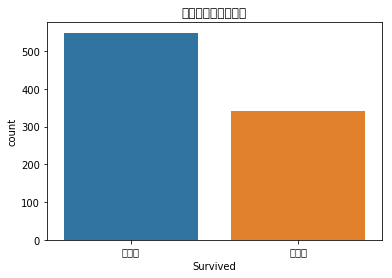

In [16]:
sns.countplot(x='Survived', data=df_train)
plt.title('死亡者と生存者の数')
plt.xticks([0, 1], ['死亡者', '生存者'])

## 死亡者と生存者数を表示
display(df_train['Survived'].value_counts())

## 死亡者と生存者割合を表示する
display(df_train['Survived'].value_counts()/len(df_train['Survived']))

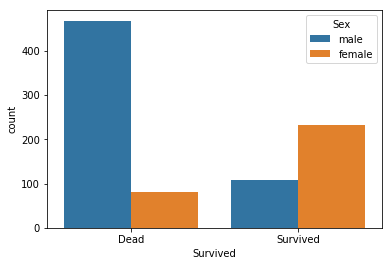

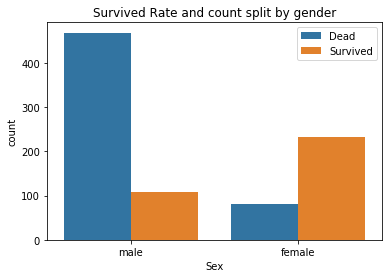

Survived,0,1
Sex,,
female,81,233
male,468,109


Survived,0,1
Sex,,
female,0.257962,0.742038
male,0.811092,0.188908


In [17]:
sns.countplot(x='Survived', hue='Sex', data=df_train)
plt.xticks([0.0,1.0], ['Dead','Survived'])
plt.show()
sns.countplot(x='Sex', hue='Survived', data=df_train)

plt.title('Survived Rate and count split by gender')
plt.legend(['Dead', 'Survived'])
plt.show()

# SexとSurvivedをクロス集計する

display(pd.crosstab(df_train['Sex'], df_train['Survived']))

# クロス集計し、Sexごとに正規化する
display(pd.crosstab(df_train['Sex'], df_train['Survived'],normalize = 'index'))

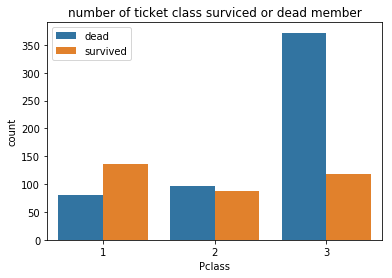

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


Survived,0,1
Pclass,,
1,0.370370,0.629630
2,0.527174,0.472826
3,0.757637,0.242363


In [18]:
# 可視化
sns.countplot(x='Pclass', hue = 'Survived', data=df_train)
plt.title('number of ticket class surviced or dead member')
plt.legend([ 'dead', 'survived' ])
plt.show()

# pclassとsurvicedのクロス集計
display(pd.crosstab(df_train['Pclass'], df_train['Survived']))

# クロス集計 && pclassごとの正規化
display(pd.crosstab(df_train['Pclass'], df_train['Survived'], normalize='index'))

### 4.2.11 年齢の分布

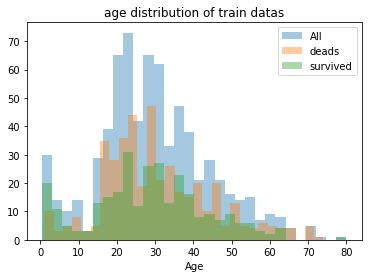

In [22]:
# ヒストグラム
sns.distplot(df_train['Age'].dropna(), kde=False, bins = 30, label = 'All')

# 死亡者ヒストグラム
sns.distplot(df_train[df_train['Survived'] == 0].Age.dropna(), kde=False, bins = 30, label = 'deads')

# 生存者
sns.distplot(df_train[df_train['Survived'] == 1].Age.dropna(), kde=False, bins = 30, label = 'survived')

plt.title('age distribution of train datas')
plt.legend()

In [23]:
df_train



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [24]:
df_train[df_train['Survived'] == 0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,NaN,Q
18,19,0,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",female,31.0,1,0,345763,18.0000,NaN,S


In [25]:
df_train[df_train['Survived'] == 0].Age

0      22.0
4      35.0
5       NaN
6      54.0
7       2.0
12     20.0
13     39.0
14     14.0
16      2.0
18     31.0
20     35.0
24      8.0
26      NaN
27     19.0
29      NaN
30     40.0
33     66.0
34     28.0
35     42.0
37     21.0
38     18.0
40     40.0
41     27.0
42      NaN
45      NaN
46      NaN
48      NaN
49     18.0
50      7.0
51     21.0
       ... 
844    17.0
845    42.0
846     NaN
847    35.0
848    28.0
850     4.0
851    74.0
852     9.0
854    44.0
859     NaN
860    41.0
861    21.0
863     NaN
864    24.0
867    31.0
868     NaN
870    26.0
872    33.0
873    47.0
876    20.0
877    19.0
878     NaN
881    33.0
882    22.0
883    28.0
884    25.0
885    39.0
886    27.0
888     NaN
890    32.0
Name: Age, Length: 549, dtype: float64

In [26]:
df_train[df_train['Survived'] == 0].Age.dropna()

0      22.0
4      35.0
6      54.0
7       2.0
12     20.0
13     39.0
14     14.0
16      2.0
18     31.0
20     35.0
24      8.0
27     19.0
30     40.0
33     66.0
34     28.0
35     42.0
37     21.0
38     18.0
40     40.0
41     27.0
49     18.0
50      7.0
51     21.0
54     65.0
57     28.5
59     11.0
60     22.0
62     45.0
63      4.0
67     19.0
       ... 
833    23.0
834    18.0
836    21.0
840    20.0
841    16.0
843    34.5
844    17.0
845    42.0
847    35.0
848    28.0
850     4.0
851    74.0
852     9.0
854    44.0
860    41.0
861    21.0
864    24.0
867    31.0
870    26.0
872    33.0
873    47.0
876    20.0
877    19.0
881    33.0
882    22.0
883    28.0
884    25.0
885    39.0
886    27.0
890    32.0
Name: Age, Length: 424, dtype: float64

In [27]:
df_train[df_train['Survived'] == 0].Age.describe()

count    424.000000
mean      30.626179
std       14.172110
min        1.000000
25%       21.000000
50%       28.000000
75%       39.000000
max       74.000000
Name: Age, dtype: float64

In [28]:
df_train[df_train['Survived'] == 0].Age.dropna().describe()

count    424.000000
mean      30.626179
std       14.172110
min        1.000000
25%       21.000000
50%       28.000000
75%       39.000000
max       74.000000
Name: Age, dtype: float64

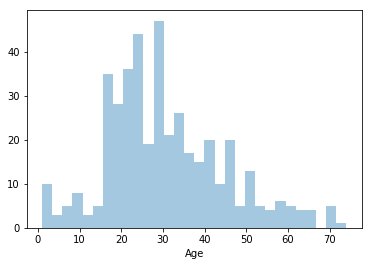

In [29]:
sns.distplot(df_train[df_train['Survived'] == 0].Age.dropna(), kde = False, bins=30, label='死亡')

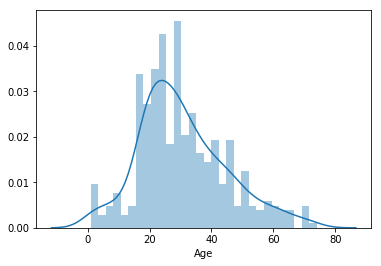

In [30]:
sns.distplot(df_train[df_train['Survived'] == 0].Age.dropna(), kde = True, bins=30, label='死亡')

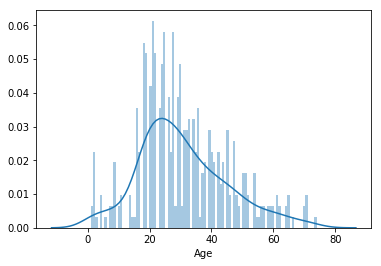

In [33]:
sns.distplot(df_train[df_train['Survived'] == 0].Age.dropna(), kde = True, bins=100, label='死亡')

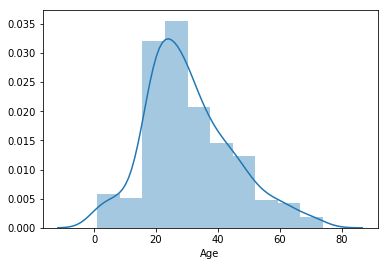

In [34]:
sns.distplot(df_train[df_train['Survived'] == 0].Age.dropna(), kde = True, bins=10, label='死亡')

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html
# pandas.cut

> Use cut when you need to segment and sort data values into bins. This function is also useful for going from a continuous variable to a categorical variable. For example, cut could convert ages to groups of age ranges. Supports binning into an equal number of bins, or a pre-specified array of bins.

> bins : int, sequence of scalars, or pandas.IntervalIndex
> The criteria to bin by.

> - int : Defines the number of equal-width bins in the range of x. The range of x is extended by .1% on each side to include the minimum and maximum values of x.

In [35]:
# 年齢を8等分し、CategoricalAgeという変数を作成
df_train['CategoricalAge'] = pd.cut(df_train['Age'], 8)
# CategoricalAgeとSurvivedをクロス集計する
display(pd.crosstab(df_train['CategoricalAge'], df_train['Survived']))
# クロス集計しCategoricalAgeごとに正規化する
display(pd.crosstab(df_train['CategoricalAge'], df_train['Survived'], normalize = 'index'))

Survived,0,1
CategoricalAge,,
"(0.34, 10.368]",26,38
"(10.368, 20.315]",71,44
"(20.315, 30.263]",146,84
"(30.263, 40.21]",86,69
"(40.21, 50.158]",53,33
"(50.158, 60.105]",25,17
"(60.105, 70.052]",13,4
"(70.052, 80.0]",4,1


Survived,0,1
CategoricalAge,,
"(0.34, 10.368]",0.406250,0.593750
"(10.368, 20.315]",0.617391,0.382609
"(20.315, 30.263]",0.634783,0.365217
"(30.263, 40.21]",0.554839,0.445161
"(40.21, 50.158]",0.616279,0.383721
"(50.158, 60.105]",0.595238,0.404762
"(60.105, 70.052]",0.764706,0.235294
"(70.052, 80.0]",0.800000,0.200000


In [36]:
display(pd.crosstab(df_train['Survived'], df_train['CategoricalAge']))

TypeError: Cannot cast array data from dtype('float64') to dtype('<U32') according to the rule 'safe'

### 4.2.12

Text(0.5, 1.0, 'title')

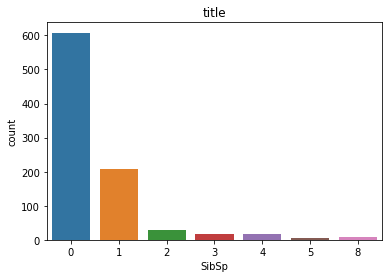

In [39]:
sns.countplot(x='SibSp', data = df_train)
plt.title("title")

In [40]:
df_train['SibSp']

0      1
1      1
2      0
3      1
4      0
5      0
6      0
7      3
8      0
9      1
10     1
11     0
12     0
13     1
14     0
15     0
16     4
17     0
18     1
19     0
20     0
21     0
22     0
23     0
24     3
25     1
26     0
27     3
28     0
29     0
      ..
861    1
862    0
863    8
864    0
865    0
866    1
867    0
868    0
869    1
870    0
871    1
872    0
873    0
874    1
875    0
876    0
877    0
878    0
879    0
880    0
881    0
882    0
883    0
884    0
885    0
886    0
887    0
888    1
889    0
890    0
Name: SibSp, Length: 891, dtype: int64

In [41]:
df_train['SibSp'].describe()

count    891.000000
mean       0.523008
std        1.102743
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        8.000000
Name: SibSp, dtype: float64

In [44]:
type(df_train['SibSp'])

pandas.core.series.Series

In [45]:
df_train['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [46]:
df_train['SibSp'].count
()

()

In [47]:
df_train['SibSp'].count()

891

In [48]:
df_train['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8])

In [ ]:
df_train['']